In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import geopandas as gpd
import rasterio as rst
from rasterio.mask import mask

from matplotlib import cm
from matplotlib.colors import Normalize 
from scipy.interpolate import interpn

import warnings
warnings.filterwarnings("ignore")

In [22]:
def month_season_detector(df):

    df['data'] = pd.to_datetime(df['date'], format='%Y/%m/%d')

    df['month'] = df['data'].dt.month

    df.loc[df['month']==1,'mes'] = 'Jan'
    df.loc[df['month']==2,'mes'] = 'Feb'
    df.loc[df['month']==3,'mes'] = 'Mar'
    df.loc[df['month']==4,'mes'] = 'Apr'
    df.loc[df['month']==5,'mes'] = 'May'
    df.loc[df['month']==6,'mes'] = 'Jun'
    df.loc[df['month']==7,'mes'] = 'Jul'
    df.loc[df['month']==8,'mes'] = 'Aug'
    df.loc[df['month']==9,'mes'] = 'Sep'
    df.loc[df['month']==10,'mes'] = 'Oct'
    df.loc[df['month']==11,'mes'] = 'Nov'
    df.loc[df['month']==12,'mes'] = 'Dec'

    df.loc[df['month']==1,'season'] = 'wet'
    df.loc[df['month']==2,'season'] = 'wet'
    df.loc[df['month']==3,'season'] = 'wet'
    df.loc[df['month']==4,'season'] = 'wet'
    df.loc[df['month']==5,'season'] = 'dry'
    df.loc[df['month']==6,'season'] = 'dry'
    df.loc[df['month']==7,'season'] = 'dry'
    df.loc[df['month']==8,'season'] = 'dry'
    df.loc[df['month']==9,'season'] = 'dry'
    df.loc[df['month']==10,'season'] = 'wet'
    df.loc[df['month']==11,'season'] = 'wet'
    df.loc[df['month']==12,'season'] = 'wet'

In [2]:
entropy_f = pd.read_csv('D:/thesis_data/POL_DECOMP/stats/florestal_entropy_reindex.csv')
entropy_s = pd.read_csv('D:/thesis_data/POL_DECOMP/stats/savanica_entropy_reindex.csv')
entropy_c = pd.read_csv('D:/thesis_data/POL_DECOMP/stats/campestre_entropy_reindex.csv')

alpha_f = pd.read_csv('D:/thesis_data/POL_DECOMP/stats/florestal_alpha_angle_reindex.csv')
alpha_s = pd.read_csv('D:/thesis_data/POL_DECOMP/stats/savanica_alpha_angle_reindex.csv')
alpha_c = pd.read_csv('D:/thesis_data/POL_DECOMP/stats/campestre_alpha_angle_reindex.csv')

In [3]:
red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')

pink_patch = dict(facecolor='pink', color='k')
blue_patch = dict(facecolor='lightblue', color='k')
green_patch = dict(facecolor='lightgreen', color='k')
orange_patch = dict(facecolor='orange', color='k')
yellow_patch = dict(facecolor='yellow', color='k')

median_patch = dict(color='red')

In [23]:
month_season_detector(entropy_f)
month_season_detector(entropy_s)
month_season_detector(entropy_c)
month_season_detector(alpha_f)
month_season_detector(alpha_s)
month_season_detector(alpha_c)

In [25]:
entropy_f_dict = {'wet': entropy_f.loc[entropy_f['season']=='wet']['median'].values, 'dry': entropy_f.loc[entropy_f['season']=='dry']['median'].values}
entropy_s_dict = {'wet': entropy_s.loc[entropy_s['season']=='wet']['median'].values, 'dry': entropy_s.loc[entropy_s['season']=='dry']['median'].values}
entropy_c_dict = {'wet': entropy_c.loc[entropy_c['season']=='wet']['median'].values, 'dry': entropy_c.loc[entropy_c['season']=='dry']['median'].values}

alpha_f_dict = {'wet': alpha_f.loc[alpha_f['season']=='wet']['median'].values, 'dry': alpha_f.loc[alpha_f['season']=='dry']['median'].values}
alpha_s_dict = {'wet': alpha_s.loc[alpha_s['season']=='wet']['median'].values, 'dry': alpha_s.loc[alpha_s['season']=='dry']['median'].values}
alpha_c_dict = {'wet': alpha_c.loc[alpha_c['season']=='wet']['median'].values, 'dry': alpha_c.loc[alpha_c['season']=='dry']['median'].values}

In [27]:
entropy_f_dict 

{'wet': array([0.76587653, 0.7616474 , 0.75991762, 0.75202572, 0.77019083,
        0.74079317, 0.74459553, 0.76456922, 0.76075494, 0.76931024,
        0.77989781, 0.75747991, 0.77329791, 0.78088611, 0.75537717,
        0.7680828 , 0.7623297 , 0.76034021, 0.76247591, 0.74204707,
        0.75710046, 0.7632674 , 0.74989372, 0.76285177, 0.76079774,
        0.75248212, 0.76340687, 0.74603128, 0.77041185, 0.77152407,
        0.76091552, 0.76021665, 0.75934565, 0.75942451, 0.7437225 ,
        0.74924356, 0.74565279, 0.75600684, 0.75260174, 0.75891602,
        0.73822999, 0.7344588 , 0.74451816, 0.73724002, 0.73664629,
        0.74461466, 0.75299841, 0.73983324, 0.73853624, 0.75362796,
        0.74515569, 0.72998857, 0.73960781, 0.73169124, 0.74458188,
        0.72178829, 0.73889035, 0.72804427, 0.74014866, 0.74412519,
        0.72420186, 0.73351288, 0.72868049, 0.75315332, 0.75307834,
        0.7452085 , 0.73455632, 0.72321111, 0.74358863, 0.74273121,
        0.7442404 , 0.74030614, 0.7403144

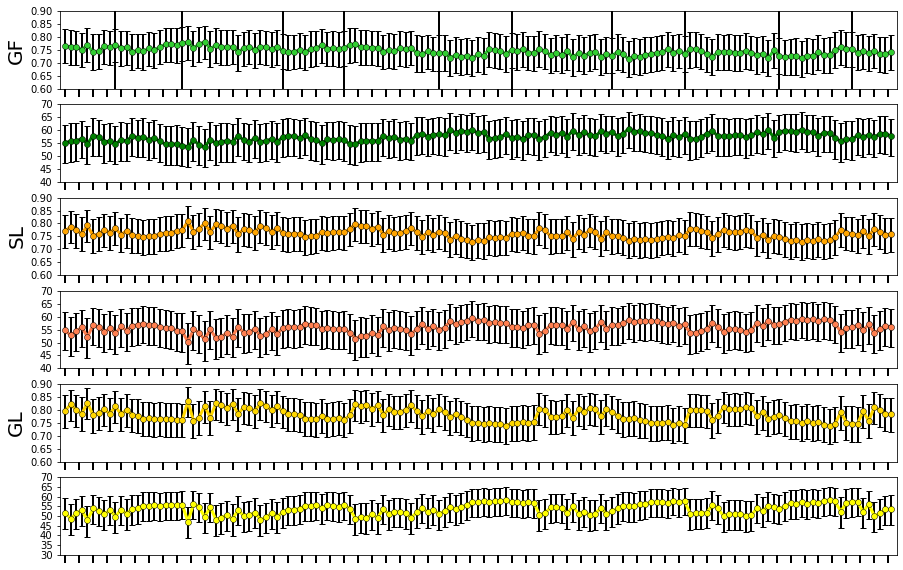

In [81]:
label_size = 20

marker_size = 6

fig, ax = plt.subplots(6,1, figsize=(15, 10))

ax[0].vlines(entropy_f.index[9], ymin=0, ymax=1.5, colors='k', linewidth=2)
ax[0].vlines(entropy_f.index[21], ymin=0, ymax=1.5, colors='k', linewidth=2)
ax[0].vlines(entropy_f.index[39], ymin=0, ymax=1.5, colors='k', linewidth=2)
ax[0].vlines(entropy_f.index[50], ymin=0, ymax=1.5, colors='k', linewidth=2)
ax[0].vlines(entropy_f.index[67], ymin=0, ymax=1.5, colors='k', linewidth=2)
ax[0].vlines(entropy_f.index[80], ymin=0, ymax=1.5, colors='k', linewidth=2)
ax[0].vlines(entropy_f.index[98], ymin=0, ymax=1.5, colors='k', linewidth=2)
ax[0].vlines(entropy_f.index[111], ymin=0, ymax=1.5, colors='k', linewidth=2)
ax[0].vlines(entropy_f.index[128], ymin=0, ymax=1.5, colors='k', linewidth=2)
ax[0].vlines(entropy_f.index[141], ymin=0, ymax=1.5, colors='k', linewidth=2)

ax[0].vlines(entropy_f.index, ymin=entropy_f['percentile_25'], ymax=entropy_f['percentile_75'], colors='k', linewidth=2)
ax[0].plot(entropy_f.index, entropy_f['median'], 'limegreen', marker='o', markersize=marker_size, markeredgewidth=0.5, markeredgecolor='k', linewidth=3, label='Entropy')
ax[0].plot(entropy_f.index, entropy_f['percentile_25'], 'ok', marker='_')
ax[0].plot(entropy_f.index, entropy_f['percentile_75'], 'ok', marker='_')
ax[0].tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=False, length=8, width=2)
ax[0].set_ylabel('GF', fontsize=20)
ax[0].set_ylim([0.6, 0.9])
ax[0].set_xlim([-1, 149])
ax[0].locator_params(axis='x', nbins=60)
ax[0].locator_params(axis='y', nbins=8)

ax[1].vlines(alpha_f.index, ymin=alpha_f['percentile_25'] * 100, ymax=alpha_f['percentile_75'] * 100, colors='k', linewidth=2)
ax[1].plot(alpha_f.index, alpha_f['median'] * 100, 'green', marker='o', markersize=marker_size, markeredgewidth=0.5, markeredgecolor='k', linewidth=3, label='Alpha Angle')
ax[1].plot(alpha_f.index, alpha_f['percentile_25'] * 100, 'ok', marker='_')
ax[1].plot(alpha_f.index, alpha_f['percentile_75'] * 100, 'ok', marker='_')
ax[1].tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=False, length=8, width=2)
ax[1].set_ylim([40, 70])
ax[1].set_xlim([-1, 149])
ax[1].locator_params(axis='x', nbins=60)
ax[1].locator_params(axis='y', nbins=8)

ax[2].vlines(entropy_s.index, ymin=entropy_s['percentile_25'], ymax=entropy_s['percentile_75'], colors='k', linewidth=2)
ax[2].plot(entropy_s.index, entropy_s['median'], 'orange', marker='o', markersize=marker_size, markeredgewidth=0.5, markeredgecolor='k', linewidth=3, label='Entropy')
ax[2].plot(entropy_s.index, entropy_s['percentile_25'], 'ok', marker='_')
ax[2].plot(entropy_s.index, entropy_s['percentile_75'], 'ok', marker='_')
ax[2].tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=False, length=8, width=2)
ax[2].set_ylabel('SL', fontsize=20)
ax[2].set_ylim([0.6, 0.9])
ax[2].set_xlim([-1, 149])
ax[2].locator_params(axis='x', nbins=60)
ax[2].locator_params(axis='y', nbins=8)

ax[3].vlines(alpha_s.index, ymin=alpha_s['percentile_25'] * 100, ymax=alpha_s['percentile_75'] * 100, colors='k', linewidth=2)
ax[3].plot(alpha_s.index, alpha_s['median'] * 100, 'coral', marker='o', markersize=marker_size, markeredgewidth=0.5, markeredgecolor='k', linewidth=3, label='Alpha Angle')
ax[3].plot(alpha_s.index, alpha_s['percentile_25'] * 100, 'ok', marker='_')
ax[3].plot(alpha_s.index, alpha_s['percentile_75'] * 100, 'ok', marker='_')
ax[3].tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=False, length=8, width=2)
ax[3].set_ylim([40, 70])
ax[3].set_xlim([-1, 149])
ax[3].locator_params(axis='x', nbins=60)
ax[3].locator_params(axis='y', nbins=8)

ax[4].vlines(entropy_c.index, ymin=entropy_c['percentile_25'], ymax=entropy_c['percentile_75'], colors='k', linewidth=2)
ax[4].plot(entropy_c.index, entropy_c['median'], 'gold', marker='o', markersize=marker_size, markeredgewidth=0.5, markeredgecolor='k', linewidth=3, label='Entropy')
ax[4].plot(entropy_c.index, entropy_c['percentile_25'], 'ok', marker='_')
ax[4].plot(entropy_c.index, entropy_c['percentile_75'], 'ok', marker='_')
ax[4].tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=False, length=8, width=2)
ax[4].set_ylabel('GL', fontsize=20)
ax[4].set_ylim([0.6, 0.9])
ax[4].set_xlim([-1, 149])
ax[4].locator_params(axis='x', nbins=60)
ax[4].locator_params(axis='y', nbins=8)

ax[5].vlines(alpha_c.index, ymin=alpha_c['percentile_25'] * 100, ymax=alpha_c['percentile_75'] * 100, colors='k', linewidth=2)
ax[5].plot(alpha_c.index, alpha_c['median'] * 100, 'yellow', marker='o', markersize=marker_size, markeredgewidth=0.5, markeredgecolor='k', linewidth=3, label='Alpha Angle')
ax[5].plot(alpha_c.index, alpha_c['percentile_25'] * 100, 'ok', marker='_')
ax[5].plot(alpha_c.index, alpha_c['percentile_75'] * 100, 'ok', marker='_')
ax[5].tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=False, length=8, width=2)
ax[5].set_ylim([30, 70])
ax[5].set_xlim([-1, 149])
ax[5].locator_params(axis='x', nbins=60)
ax[5].locator_params(axis='y', nbins=8)

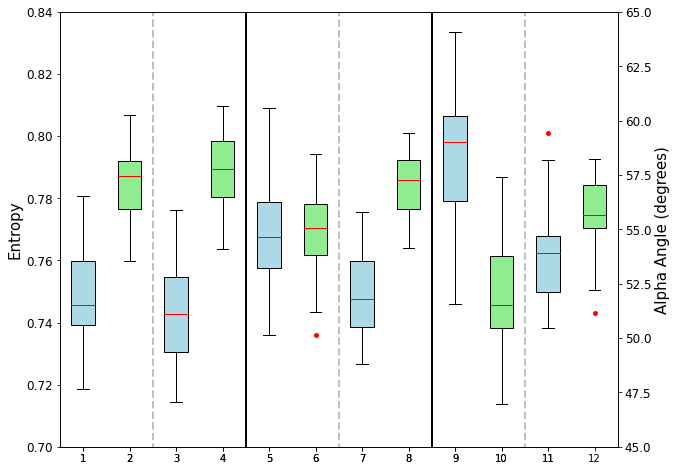

In [82]:
fig, ax = plt.subplots(figsize=(10,8))

ax.vlines(2.5, ymin=0.6, ymax=1, colors='grey', linewidth=2, linestyle='--', alpha=0.5)
ax.vlines(4.5, ymin=0.6, ymax=1, colors='k', linewidth=2)
ax.vlines(6.5, ymin=0.6, ymax=1, colors='grey', linewidth=2, linestyle='--', alpha=0.5)
ax.vlines(8.5, ymin=0.6, ymax=1, colors='k', linewidth=2)
ax.vlines(10.5, ymin=0.6, ymax=1, colors='grey', linewidth=2, linestyle='--', alpha=0.5)

ax.boxplot([entropy_f_dict['wet'], [np.nan], entropy_f_dict['dry'], [np.nan], entropy_s_dict['wet'], [np.nan], entropy_s_dict['dry'], [np.nan], entropy_c_dict['wet'], [np.nan], entropy_c_dict['dry']], patch_artist=True, flierprops=red_circle, boxprops=blue_patch, medianprops=median_patch)
ax.set_ylim([0.7, 0.84])
ax.locator_params(axis='y', nbins=12)
ax.set_ylabel('Entropy', fontsize=15)
ax.tick_params(axis='y', labelsize=12)

sec_0 = ax.twinx()
sec_0.boxplot([[np.nan], alpha_f_dict['wet']*100, [np.nan], alpha_f_dict['dry']*100, [np.nan], alpha_s_dict['wet']*100, [np.nan], alpha_s_dict['dry']*100, [np.nan], alpha_c_dict['wet']*100, [np.nan], alpha_c_dict['dry']*100], patch_artist=True, flierprops=red_circle, boxprops=green_patch, medianprops=median_patch)
sec_0.set_ylim([45, 65])
sec_0.set_ylabel('Alpha Angle (degrees)', fontsize=15)
sec_0.tick_params(axis='y', labelsize=12)

#plt.savefig('C:/Users/jales/Desktop/pol_decomp_boxplots.svg', dpi=None, facecolor='w', edgecolor='w', orientation='landscape', format='svg', transparent=False)


In [84]:
roi = gpd.read_file('D:/thesis_data/ROI/classes/form_campestre_30m_32723.geojson')

roi_geom = roi.geometry.unary_union

In [85]:
slc_samples_path = 'D:/thesis_data/POL_DECOMP/rasters/'

with rst.open(slc_samples_path + 'S1_split_Orb_Cal_Deb_Sub_Mul_C2_Spk_Decomp_TC_20190102T084503_32723.tif') as raster_slc:
    image_slc, transform_slc = mask(raster_slc, [roi_geom], crop=True, nodata=np.nan)

    entropy = image_slc[0]
    anisotropy = image_slc[1]
    alpha_angle = image_slc[2]

In [86]:
df = pd.DataFrame({'entropy': entropy.flatten(), 'alpha_angle': alpha_angle.flatten()})
df.dropna(inplace=True)

def calc_h_alpha(C2):
    assert isinstance(C2, np.ndarray)
    assert C2.ndim >= 2
    assert C2.shape[-2:] == (2, 2)

    EPS = 1e-30
    eig_values, eig_vectors = np.linalg.eigh(C2)
    eig_values[eig_values < EPS] = EPS

    probs = eig_values / np.sum(eig_values, axis=-1, keepdims=True)

    h = -np.sum(probs * (np.log(probs) / np.log(2)), axis=-1)

    alpha = np.sum(probs * np.arccos(np.abs(eig_vectors[..., 0, :])), axis=-1)
    return h, np.degrees(alpha)


def curve1_C2(m):
    assert 0.0 <= m <= 1.0
    return np.array(
        [
            [1, 0],
            [0, m],
        ]
    )

def curve2_C2(m):
    assert 0.0 <= m <= 1.0
    return (
        np.array(
            [
                [m, 0],
                [0, 1],
            ]
        )      
    )

In [87]:
x = df.entropy
y = df.alpha_angle

data , x_e, y_e = np.histogram2d(x, y, bins = [150,150], density=True)
z = interpn( ( 0.5*(x_e[1:] + x_e[:-1]) , 0.5*(y_e[1:]+y_e[:-1]) ), data, np.vstack([x,y]).T, method = "splinef2d", bounds_error = False)

#To be sure to plot all data
z[np.where(np.isnan(z))] = 0.0

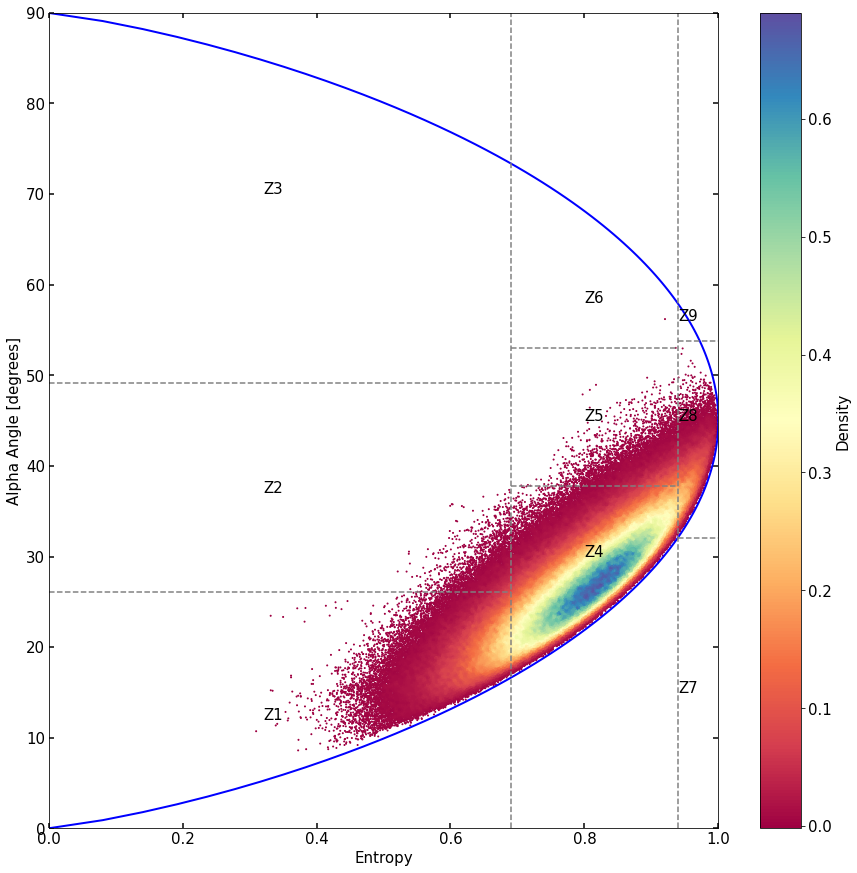

In [89]:
fig, ax = plt.subplots(figsize=(15, 15))

curve_style = {

    "color": "b",
    "linewidth": 2
}

ax.plot(*calc_h_alpha(np.array([curve1_C2(m) for m in np.linspace(0, 1, 100)])), **curve_style)
ax.plot(*calc_h_alpha(np.array([curve2_C2(m) for m in np.linspace(0, 1, 100)])), **curve_style)

bounds = [
([0, 0.69], [26.1, 26.1]),
([0, 0.69], [49.1, 49.1]),
([0.69, 0.69], [0.0, 90.0]),
([0.69, 0.94], [37.8, 37.8]),
([0.69, 0.94], [53.0, 53.0]),
([0.94, 0.94], [0.0, 90.0]),
([0.94, 1.0], [32.0, 32.0]),
([0.94, 1.0], [53.8, 53.8]),
]

for xs, ys in bounds:
    ax.plot(xs, ys, "--", color="gray")

ax.scatter(x, y, c=z, s=1, cmap='Spectral')

ax.set_xlim(0, 1)
ax.set_ylim(0, 90)
ax.set_xlabel("Entropy", fontsize=15)
ax.set_ylabel("Alpha Angle [degrees]", fontsize=15)
ax.tick_params(top="on", right="on", direction="in")
ax.tick_params(axis='y', length=5, width=1.5, labelsize=15)
ax.tick_params(axis='x', length=5, width=1.5, labelsize=15)

# Zones
ax.text(0.32, 70, 'Z3', fontsize=15)
ax.text(0.32, 37, 'Z2', fontsize=15)
ax.text(0.32, 12, 'Z1', fontsize=15)

ax.text(0.8, 58, 'Z6', fontsize=15)
ax.text(0.8, 45, 'Z5', fontsize=15)
ax.text(0.8, 30, 'Z4', fontsize=15)

ax.text(0.94, 56, 'Z9', fontsize=15)
ax.text(0.94, 45, 'Z8', fontsize=15)
ax.text(0.94, 15, 'Z7', fontsize=15)

# Colorbar
norm = Normalize(vmin = np.min(z), vmax = np.max(z))
cbar = fig.colorbar(cm.ScalarMappable(norm = norm, cmap='Spectral'), ax=ax)
cbar.ax.set_ylabel('Density', fontsize=15)
cbar.ax.tick_params(labelsize=15)

#plt.savefig('C:/Users/jales/Desktop/campestre_h_alpha_2019_01_02_test.svg', dpi=None, facecolor='w', edgecolor='w', orientation='landscape', format='svg', transparent=False)